<a href="https://colab.research.google.com/github/Junesa-Irene/mat-271-project/blob/main/project_on_house_pricing_prediction1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/housing.csv")

In [ ]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data.nunique

<bound method DataFrame.nunique of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       populatio

In [ ]:
data.shape

(20640, 10)

In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'],axis=1)
y=data['median_house_value']

In [ ]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND


In [ ]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

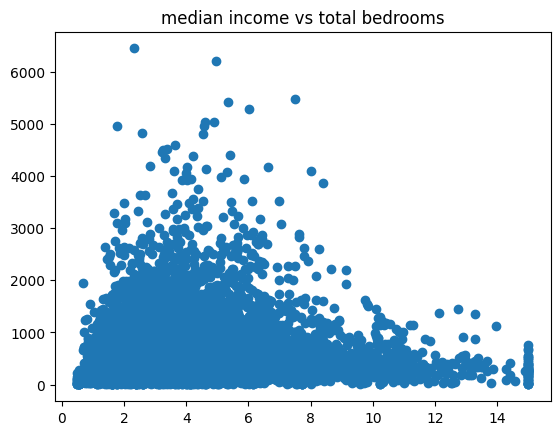

In [ ]:
plt.scatter (data.median_income, data.total_bedrooms)
plt.title("median income vs total bedrooms")
sns.despine

<Figure size 2000x900 with 0 Axes>

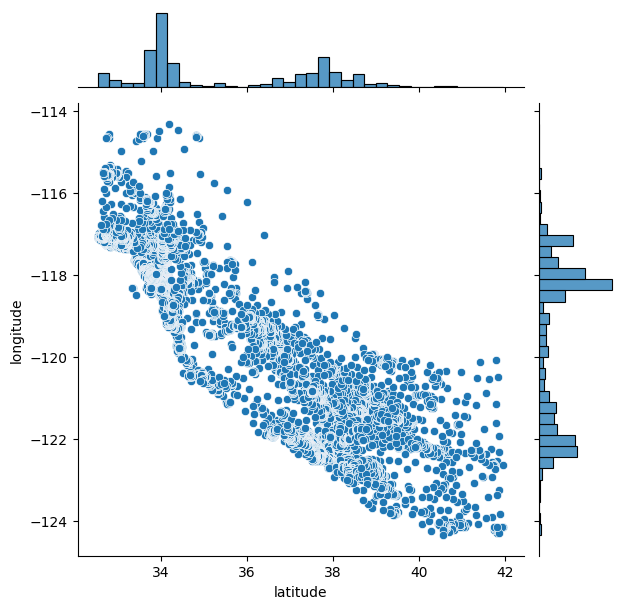

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [ ]:
plt.figure(figsize=(20,9))
sns.jointplot(x=data.latitude.values,y=data.longitude.values)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.show()
sns.despine

In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
train_data=x_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
16151,-122.48,37.78,52,2666,515.0,1362,494,4.2180,NEAR BAY,393800
16004,-122.46,37.75,52,1849,287.0,695,258,6.5372,NEAR BAY,394000
7228,-118.16,34.01,40,1552,NaN,1919,427,2.2596,<1H OCEAN,137500
17619,-121.93,37.27,30,2862,544.0,1387,542,5.1104,<1H OCEAN,278100
3214,-119.64,36.34,32,2958,670.0,1504,627,1.8606,INLAND,56700
...,...,...,...,...,...,...,...,...,...,...
1239,-120.27,38.31,13,3297,662.0,267,97,3.0750,INLAND,108300
12870,-121.40,38.71,15,4680,758.0,2626,729,3.8355,INLAND,107000
16366,-121.30,38.01,30,2547,485.0,1547,501,3.9940,INLAND,95500
14799,-117.11,32.58,12,1086,294.0,870,290,2.4213,NEAR OCEAN,132500


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

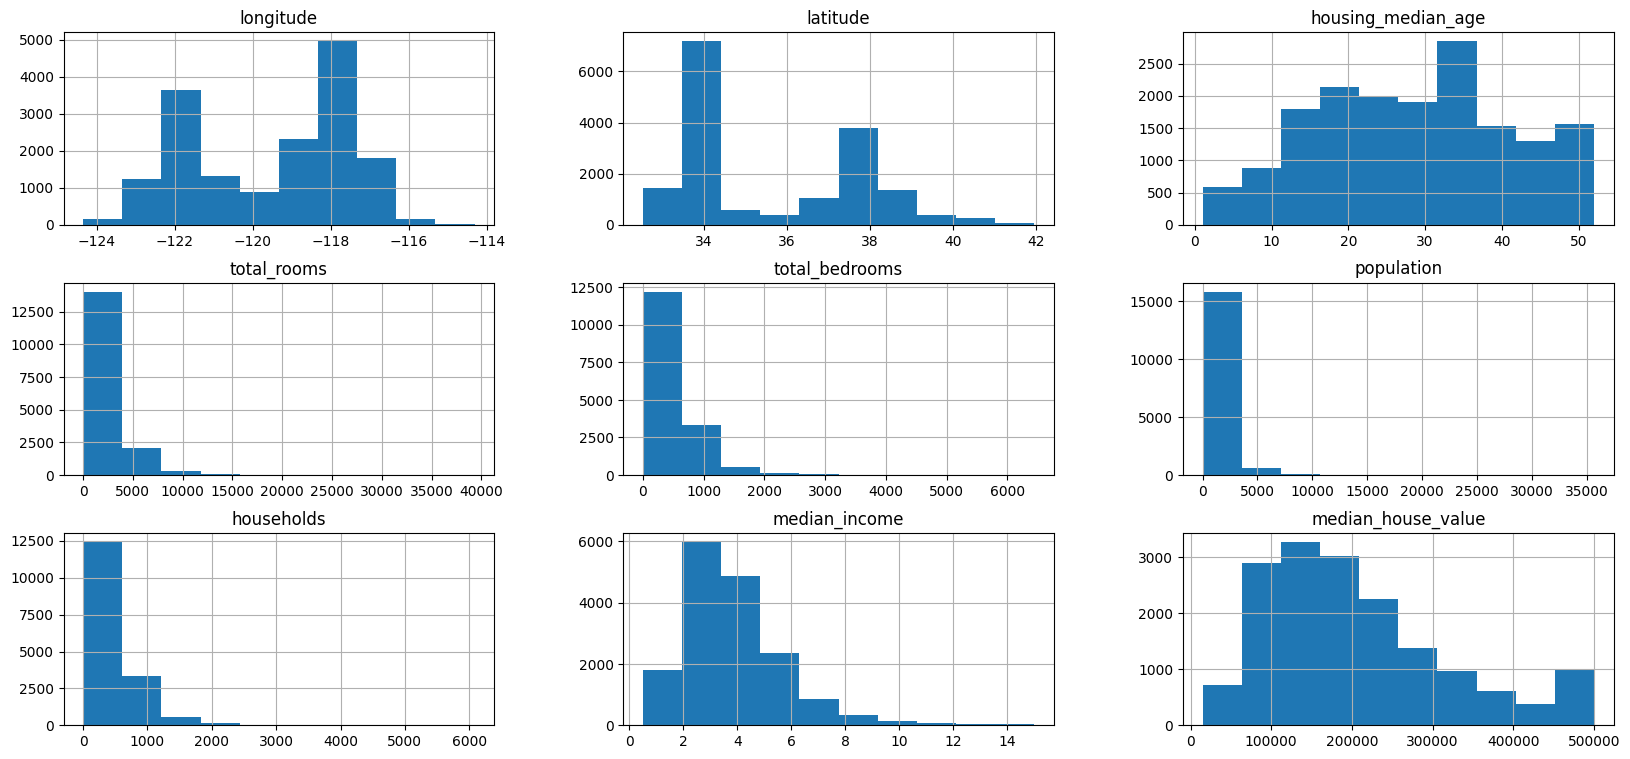

In [ ]:
train_data.hist(figsize=(20,9))

<ipython-input-20-83977b693885>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_data.corr(), annot=True)


<Axes: >

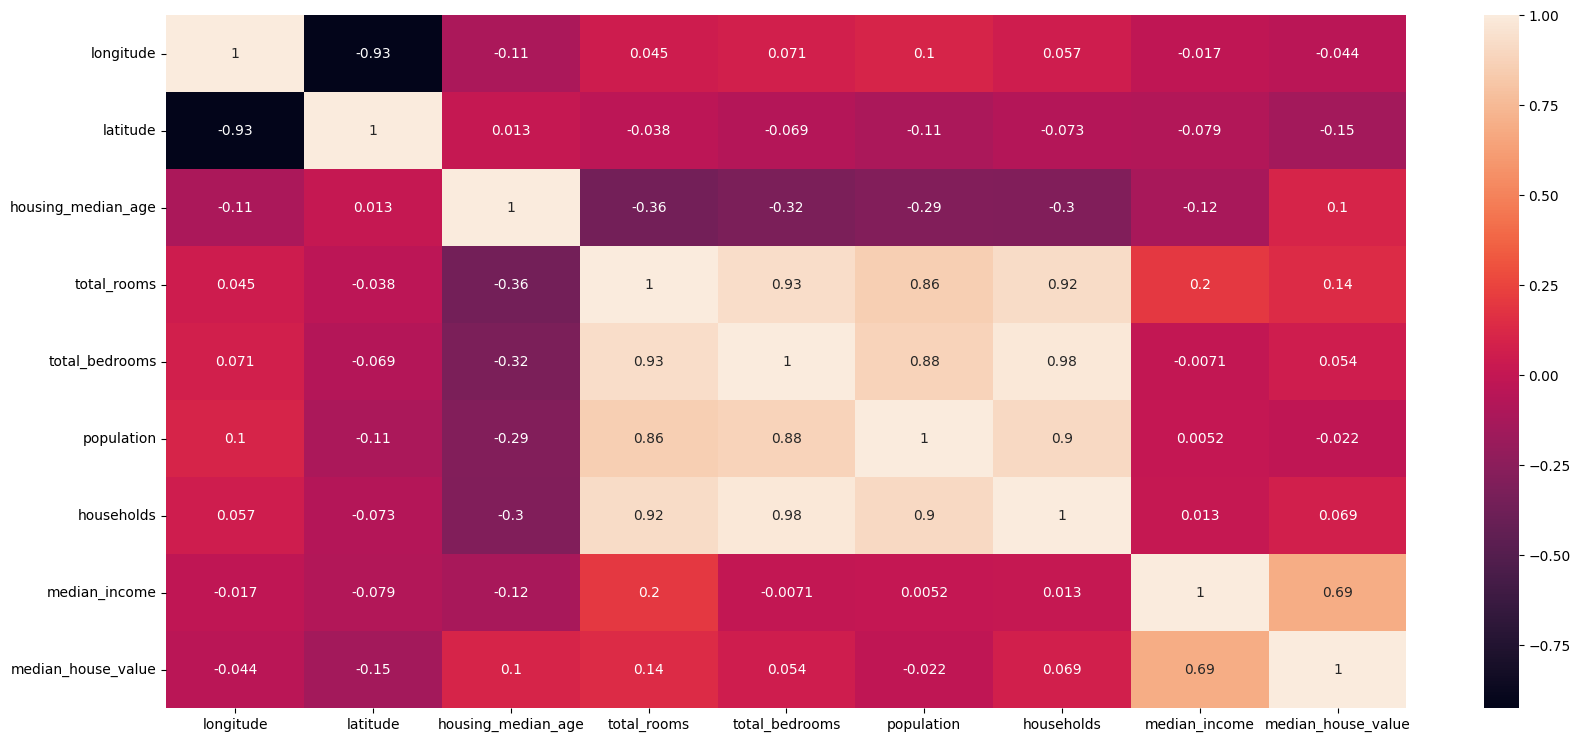

In [ ]:
plt.figure(figsize=(20,9))
sns.heatmap(train_data.corr(), annot=True)

In [ ]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7297
INLAND        5221
NEAR OCEAN    2141
NEAR BAY      1848
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16151,-122.48,37.78,52,2666,515.0,1362,494,4.2180,NEAR BAY,393800,0,0,0,1,0
16004,-122.46,37.75,52,1849,287.0,695,258,6.5372,NEAR BAY,394000,0,0,0,1,0
7228,-118.16,34.01,40,1552,NaN,1919,427,2.2596,<1H OCEAN,137500,1,0,0,0,0
17619,-121.93,37.27,30,2862,544.0,1387,542,5.1104,<1H OCEAN,278100,1,0,0,0,0
3214,-119.64,36.34,32,2958,670.0,1504,627,1.8606,INLAND,56700,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,-120.27,38.31,13,3297,662.0,267,97,3.0750,INLAND,108300,0,1,0,0,0
12870,-121.40,38.71,15,4680,758.0,2626,729,3.8355,INLAND,107000,0,1,0,0,0
16366,-121.30,38.01,30,2547,485.0,1547,501,3.9940,INLAND,95500,0,1,0,0,0
14799,-117.11,32.58,12,1086,294.0,870,290,2.4213,NEAR OCEAN,132500,0,0,0,0,1


In [ ]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16151,-122.48,37.78,52,2666,515.0,1362,494,4.2180,393800,0,0,0,1,0
16004,-122.46,37.75,52,1849,287.0,695,258,6.5372,394000,0,0,0,1,0
7228,-118.16,34.01,40,1552,NaN,1919,427,2.2596,137500,1,0,0,0,0
17619,-121.93,37.27,30,2862,544.0,1387,542,5.1104,278100,1,0,0,0,0
3214,-119.64,36.34,32,2958,670.0,1504,627,1.8606,56700,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,-120.27,38.31,13,3297,662.0,267,97,3.0750,108300,0,1,0,0,0
12870,-121.40,38.71,15,4680,758.0,2626,729,3.8355,107000,0,1,0,0,0
16366,-121.30,38.01,30,2547,485.0,1547,501,3.9940,95500,0,1,0,0,0
14799,-117.11,32.58,12,1086,294.0,870,290,2.4213,132500,0,0,0,0,1


<Axes: >

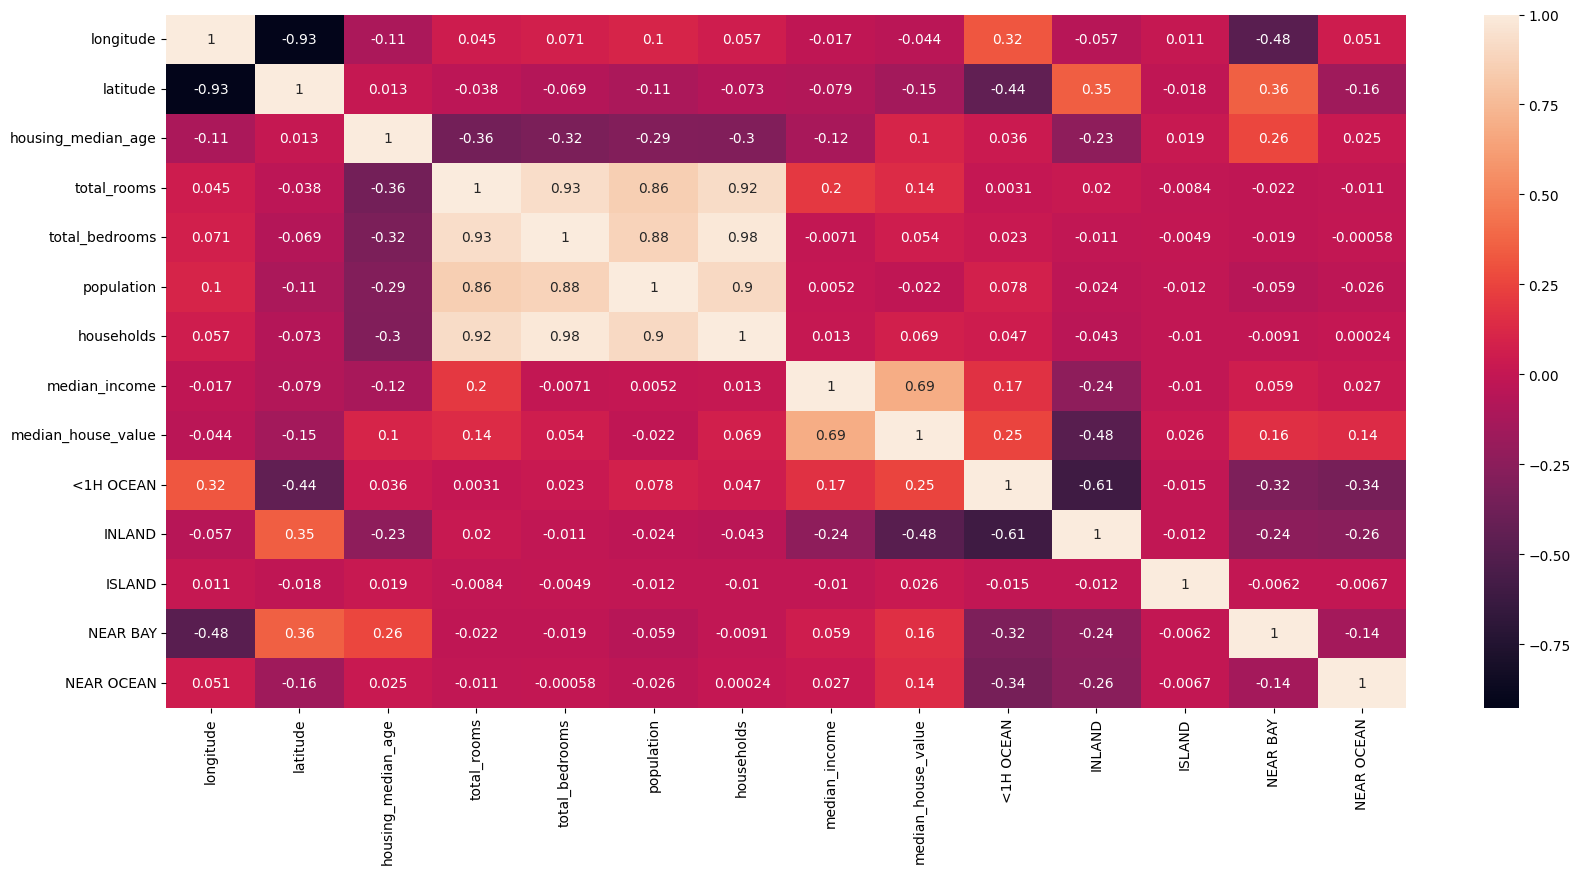

In [ ]:
plt.figure(figsize=(20,9))
sns.heatmap(train_data.corr(), annot=True)

In [ ]:
from logging import StreamHandler
from sklearn.linear_model import LinearRegression
x_train,y_train=train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
x_test,y_test=test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']
test_data=x_test.join(y_test)
reg=LinearRegression()


In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,median_house_value
18747,-122.33,40.52,23,2801,507.0,1318,454,3.5081,0,1,0,0,116700
10355,-117.60,33.72,36,1317,228.0,531,214,5.6346,1,0,0,0,272500
11277,-117.96,33.80,33,1984,420.0,1119,387,3.4821,1,0,0,0,231300
4898,-118.24,34.01,30,405,86.0,376,68,1.7813,1,0,0,0,127500
5970,-117.78,34.09,32,2643,516.0,1862,478,3.7177,0,1,0,0,177200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20368,-118.91,34.18,17,3220,716.0,1381,733,2.8958,1,0,0,0,176000
4773,-118.34,34.03,48,1426,331.0,784,356,1.6581,1,0,0,0,118800
8569,-118.43,33.90,27,1536,377.0,553,326,5.4088,1,0,0,0,500001
5926,-117.80,34.11,25,5039,821.0,2654,802,4.7969,0,1,0,0,211700


In [ ]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
16151,-122.48,37.78,52,2666,515.0,1362,494,4.2180,0,0,0,1,0
16004,-122.46,37.75,52,1849,287.0,695,258,6.5372,0,0,0,1,0
7228,-118.16,34.01,40,1552,NaN,1919,427,2.2596,1,0,0,0,0
17619,-121.93,37.27,30,2862,544.0,1387,542,5.1104,1,0,0,0,0
3214,-119.64,36.34,32,2958,670.0,1504,627,1.8606,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1239,-120.27,38.31,13,3297,662.0,267,97,3.0750,0,1,0,0,0
12870,-121.40,38.71,15,4680,758.0,2626,729,3.8355,0,1,0,0,0
16366,-121.30,38.01,30,2547,485.0,1547,501,3.9940,0,1,0,0,0
14799,-117.11,32.58,12,1086,294.0,870,290,2.4213,0,0,0,0,1


In [ ]:
y_train

16151    393800
16004    394000
7228     137500
17619    278100
3214      56700
          ...  
1239     108300
12870    107000
16366     95500
14799    132500
6005     113600
Name: median_house_value, Length: 16512, dtype: int64

In [ ]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
18747,-122.33,40.52,23,2801,507.0,1318,454,3.5081,0,1,0,0
10355,-117.60,33.72,36,1317,228.0,531,214,5.6346,1,0,0,0
11277,-117.96,33.80,33,1984,420.0,1119,387,3.4821,1,0,0,0
4898,-118.24,34.01,30,405,86.0,376,68,1.7813,1,0,0,0
5970,-117.78,34.09,32,2643,516.0,1862,478,3.7177,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20368,-118.91,34.18,17,3220,716.0,1381,733,2.8958,1,0,0,0
4773,-118.34,34.03,48,1426,331.0,784,356,1.6581,1,0,0,0
8569,-118.43,33.90,27,1536,377.0,553,326,5.4088,1,0,0,0
5926,-117.80,34.11,25,5039,821.0,2654,802,4.7969,0,1,0,0


In [ ]:
y_test

18747    116700
10355    272500
11277    231300
4898     127500
5970     177200
          ...  
20368    176000
4773     118800
8569     500001
5926     211700
2331      52500
Name: median_house_value, Length: 4128, dtype: int64

In [ ]:
reg.fit(x_train,y_train)

In [ ]:
reg (copy_x=True,fit_intercept=True, n_jobs=1,normalize=False) 

In [ ]:
reg.score(x_test,y_test)

In [ ]:
0.852804571796